 #### Урок 11. Jupyter Notebook и несколько слов об аналитике
#### По желанию(scipy):
$f(x) = -12 x^4 sin(cos(x)) - 18x^3+5x^2 + 10x - 30$ 

1. Определить корни ;
2. Найти интервалы, на которых функция возрастает ;
3. Найти интервалы, на которых функция убывает ;
4. Построить график ;
5. Вычислить вершину ;
6. Определить промежутки, на которых $f(x) > 0$ ;
7. Определить промежутки, на которых $f(x) < 0$ .



_Импортируем пакеты, необходимые для решения._

In [1]:
import sympy as sp
from sympy.abc import x, y
from sympy import nsolve, diff
from sympy import symbols
x0 = symbols('x0')

_Для начала_
### ***4. Построим график:***

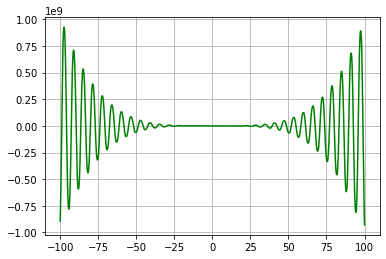

In [2]:
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt

y0 = -12*x0**4*sp.sin(sp.cos(x0)) - 18*x0**3+5*x0*2 + 10*x0 - 30
y = lambda x: -12*x**4*sin(cos(x)) - 18*x**3+5*x*2 + 10*x - 30
fig = plt.subplots()
x = np.linspace(-100, 100, 1000)

plt.plot(x, y(x), '-g')
plt.grid()

 #### *Для определения периодичности возьмём другой масштаб*

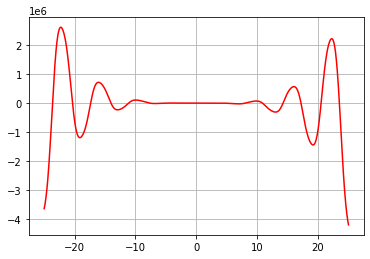

In [3]:
x = np.linspace(-25, 25, 1000)
plt.plot(x, y(x), '-r')
plt.grid()

 #### *График функции имеет множество корней, но не имеет периода.*

*Поэтому найдём корни уравнения методом*   **nsolve()** *из пакета Sympy :
    \
Этот метод возвращает "ValueError" при неточном первом приближении,
    \
проигнорируем эту ошибку оператором "try - except".
\
Для исключения повторения корней сохранять их будем в множестве* **root**,
\
*которое затем отсортируем по возрастанию и сохраним корни в список* **root1**.

In [4]:
root = set()
n = -15
k = 25
for j in range(n, k, 2):
    try: root.add(round(sp.nsolve(y0, x0, j), 2))
    except ValueError: pass
root1 = list(sorted(root))
print(root1)

[-14.03, -11.13, -7.66, -5.00000000000000, -1.52, 2.28, 4.37, 8.04, 10.86, 14.24, 17.19, 20.49, 23.50]


 ### ***1. Список корней уравнения на интервале*** **[-15, 25] :**
 #### [-14.03,  -11.13,  -7.66, -5.00, -1.52, 2.28, 4.37, 8.04, 10.86, 14.24, 17.19, 20.49, 23.50]
\
\
*Найдем интервалы, на которых фукция возрастает :*

*Определим первую производную методом*  **diff()**. 

In [5]:
y00 = diff(y0)
print(y00)

12*x0**4*sin(x0)*cos(cos(x0)) - 48*x0**3*sin(cos(x0)) - 54*x0**2 + 20


 *Первая производная равна :*
### $y'(x) = 12x^4sin(x)cos(cos(x))-48x^3sin(cos(x))-54x^2+20$
 *Функция возрастает на интервалах, где производная > 0, и убывает на интевалах, где производная < 0.
    \
 Для этого найдем корни производной :*

In [6]:
root_dif = set()
n = -15
k = 25
for j in range(n, k, 1):
    try: root_dif.add(round(sp.nsolve(y00, x0, j), 2))
    except ValueError: pass
root_dif1 = list(sorted(root_dif))
print(root_dif1)

[-16.08, -12.94, -9.98, -6.83, -4.16, -0.77, 0.53, 1.72, 3.81, 7.00000000000000, 9.88, 13.01, 16.03, 19.17, 22.24, 25.38]


*Найдём интервалы, где производная > 0.*

In [7]:
if (root_dif1[0] + root_dif1[1]) / 2 > 0:
    list_up = [root-dif1[x:x+2] for x in range(0, len(root_dif1) - 1, 2)]
    print(list_up)
else:
    list_up = [root_dif1[x + 1:x+3] for x in range(0, len(root_dif1) - 1, 2)]
    print(list_up)

[[-12.94, -9.98], [-6.83, -4.16], [-0.77, 0.53], [1.72, 3.81], [7.00000000000000, 9.88], [13.01, 16.03], [19.17, 22.24], [25.38]]


 ### ***2. Функция возрастает на интервалах :***
 #### [-12.94, -9.98], [-6.83, -4.16], [-0.77, 0.53], [1.72, 3.81], [7.00, 9.88], [13.01, 16.03], [19.17, 22.24], [25.38]
\
\
*Найдем интервалы, на которых фукция убывает :*

In [8]:
if (root_dif1[0] + root_dif1[1]) / 2 < 0:
    list_dn = [root_dif1[x:x+2] for x in range(0, len(root_dif1) - 1, 2)]
    print(list_dn)
else:
    list_dn = [root_dif1[x + 1:x+3] for x in range(0, len(root_dif1) - 1, 2)]
    print(list_dn)

[[-16.08, -12.94], [-9.98, -6.83], [-4.16, -0.77], [0.53, 1.72], [3.81, 7.00000000000000], [9.88, 13.01], [16.03, 19.17], [22.24, 25.38]]


 ### ***3. Функция убывает на интервалах :***
 #### [-16.08, -12.94], [-9.98, -6.83], [-4.16, -0.77], [0.53, 1.72], [3.81, 7.00], [9.88, 13.01], [16.03, 19.17], [22.24, 25.38]
\
\
*Вычислим экстремумы : Здесь производная равна нулю.
    \
 Результаты возьмём выше из* **root_dif1**.

 ### ***5. Экстремумы уравнения равны :***
 #### [-16.08, -12.94, -9.98, -6.83, -4.16, -0.77, 0.53, 1.72, 3.81, 7.00, 9.88, 13.01, 16.03, 19.17, 22.24, 25.38]
\
\
*Найдем интервалы, на которых функция > 0. Алгоритм возьмём из п.2, 
\
но для списка корней функци* **root1:**

In [9]:
if (root1[0] + root1[1]) / 2 > 0:
    list_pos = [root1[x:x+2] for x in range(0, len(root1) - 1, 2)]
    print(list_pos)
else:
    list_pos = [root1[x + 1:x+3] for x in range(0, len(root1) - 1, 2)]
    print(list_pos)

[[-11.13, -7.66], [-5.00000000000000, -1.52], [2.28, 4.37], [8.04, 10.86], [14.24, 17.19], [20.49, 23.50]]


 ### ***6. Функция > 0 на интервалах :***
 #### [-11.13, -7.66], [-5.00, -1.52], [2.28, 4.37], [8.04, 10.86], [14.24, 17.19], [20.49, 23.50]
\
\
*Найдем интервалы, на которых функция < 0. Алгоритм возьмём из п.3, 
\
но для списка корней функци* **root1:**

In [10]:
if (root1[0] + root1[1]) / 2 < 0:
    list_neg = [root1[x:x+2] for x in range(0, len(root1) - 1, 2)]
    print(list_neg)
else:
    list_neg = [root1[x + 1:x+3] for x in range(0, len(root1) - 1, 2)]
    print(list_neg)

[[-14.03, -11.13], [-7.66, -5.00000000000000], [-1.52, 2.28], [4.37, 8.04], [10.86, 14.24], [17.19, 20.49]]


 ### ***7. Функция < 0 на интервалах :***
 #### [-14.03, -11.13], [-7.66, -5.00], [-1.52, 2.28], [4.37, 8.04], [10.86, 14.24], [17.19, 20.49]